In [183]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import random

In [184]:
# worker1=pd.read_csv("./Saved Training data/ActionStateRewardlog0.csv",index_col=0)
# worker2=pd.read_csv("./Saved Training data/ActionStateRewardlog1.csv",index_col=0)
# worker3=pd.read_csv("./Saved Training data/ActionStateRewardlog2.csv",index_col=0)
# worker4=pd.read_csv("./Saved Training data/ActionStateRewardlog3.csv",index_col=0)

In [185]:
df_sklearn=pd.read_csv("data1.csv",index_col=0)

In [186]:
worker1=pd.read_csv("ActionStateRewardlog0.csv",index_col=0)
worker2=pd.read_csv("ActionStateRewardlog1.csv",index_col=0)
worker3=pd.read_csv("ActionStateRewardlog2.csv",index_col=0)
worker4=pd.read_csv("ActionStateRewardlog3.csv",index_col=0)

In [187]:
worker1['measurement_start'][0]

0.908354114713217

In [188]:
df_sklearn=pd.read_csv("data1.csv",index_col=0)

In [189]:
df_sklearn=compute_correct_qdelay(df_sklearn)

{'max_value': 480000, 'min_value': 0}
<class 'dict'>


In [190]:
# Assuming worker1['measurement_start'][0] is a scalar value
worker1_measurement_start = worker1['measurement_start'][0]

# Calculate the absolute differences
df_sklearn['abs_diff'] = abs(df_sklearn['measurement_start'] - worker1_measurement_start)

# Sort the DataFrame based on absolute differences and take the closest row
df_sort = df_sklearn.iloc[df_sklearn['abs_diff'].argsort()[:1000]].copy()

# Drop the temporary column 'abs_diff' if you don't need it anymore
df_sklearn = df_sklearn.drop('abs_diff', axis=1)


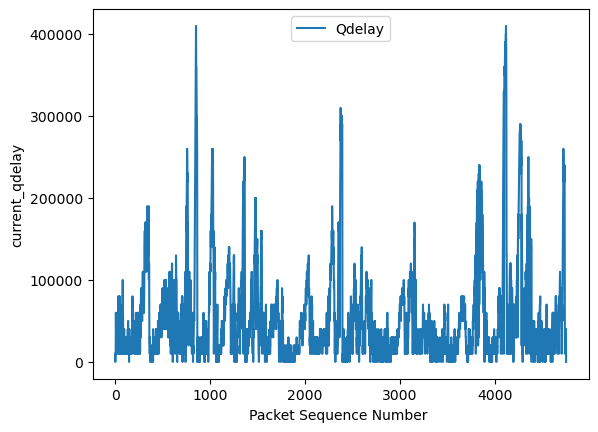

In [191]:
plt.plot(df_sklearn.index,df_sklearn['current_qdelay'],'-', label="Qdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('current_qdelay')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()

In [192]:
def compute_correct_qdelay(df):
    

    import json
    
    # Opening JSON file
    with open('Min_max_values_for_qdelay.json', 'r') as openfile:
    
        # Reading from json file
        json_object = json.load(openfile)
    
    print(json_object)
    print(type(json_object))

    df['current_qdelay']=(df['current_qdelay']*(json_object["max_value"] - json_object["min_value"]))/15+ json_object["min_value"]

    df['current_qdelay']=df['current_qdelay']*-1

    return df

In [193]:


import json
 
# Opening JSON file
with open('Min_max_values_for_qdelay.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)
 
print(json_object)
print(type(json_object))


# Min-Max scaling
df=worker1
col_name="reward"
min_value = df[col_name].min()
max_value = df[col_name].max()

df['current_qdelay']=(df['current_qdelay']*(json_object["max_value"] - json_object["min_value"]))/15+ json_object["min_value"]

df['current_qdelay']=df['current_qdelay']*-1

df['scaled_reward'] = (df[col_name] - min_value) / (max_value - min_value) 

print(df['scaled_reward'].min())
print(df['scaled_reward'].max())

print(df['current_qdelay'].min())
print(df['current_qdelay'].max())


df['predicted_qdelay'] = (df['current_qdelay'] * df['scaled_reward'])

worker1=df

{'max_value': 480000, 'min_value': 0}
<class 'dict'>
0.0
1.0
-0.0
400000.0


In [194]:
df['scaled_reward']

0      0.125
1      1.000
2      0.525
3      1.000
4      0.850
       ...  
96     0.850
97     0.850
98     0.825
99     0.000
100    1.000
Name: scaled_reward, Length: 101, dtype: float64

In [195]:
worker1["current_qdelay"].max()

400000.0

In [196]:
worker1["scaled_reward"].max()

1.0

In [197]:
worker1["scaled_reward"].min()

0.0

In [198]:
print(worker1['predicted_qdelay'].min())
print(worker1['predicted_qdelay'].max())

0.0
400000.0


In [199]:
worker1

,burst_allowance,drop_prob,current_qdelay,qdelay_old,accu_prob,measurement_start,tot_pkts,tot_bytes,length,len_bytes,drops,ecn,action,reward,scaled_reward,predicted_qdelay
0,1.000000,-0.999988,10000.0,0.020833,0.000000,0.908354,0.006129,0.007832,0.003257,0.003690,0.000000,1.0,-0.042886,-10.9375,0.125,1250.0
1,0.000000,-0.041500,350000.0,0.729167,0.073361,0.919119,0.057761,0.073322,0.491857,0.557179,0.059735,1.0,-1.000000,-0.0000,1.000,350000.0
2,0.333333,-1.000000,-0.0,0.000000,0.000000,0.998545,0.137096,0.027774,0.000000,0.000000,0.000000,0.0,-0.588962,-5.9375,0.525,-0.0
3,0.000000,-0.589220,190000.0,0.395833,0.000000,0.873857,0.055701,0.070710,0.348534,0.394822,0.013274,0.0,-1.000000,-0.0000,1.000,190000.0
4,0.333333,-1.000000,-0.0,0.000000,0.000000,0.998545,0.137096,0.027774,0.000000,0.000000,0.000000,0.0,-0.972186,-1.8750,0.850,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,-0.262943,360000.0,0.750000,0.000000,0.108479,0.292947,0.241941,0.514658,0.471228,0.230088,0.0,-0.992874,-1.8750,0.850,306000.0
97,0.222222,-0.992888,60000.0,0.125000,0.000000,0.708853,0.433916,0.544924,0.087948,0.099628,0.283186,0.0,-0.625607,-1.8750,0.850,51000.0
98,0.000000,-0.625441,60000.0,0.125000,0.062279,0.751538,0.574076,0.722224,0.114007,0.129147,0.360619,0.0,-0.333954,-2.1875,0.825,49500.0
99,0.000000,-0.334630,70000.0,0.145833,0.000000,0.213799,0.055015,0.046425,0.104235,0.068239,0.088496,0.0,0.529280,-12.5000,0.000,0.0


In [200]:
worker1.describe()


,burst_allowance,drop_prob,current_qdelay,qdelay_old,accu_prob,measurement_start,tot_pkts,tot_bytes,length,len_bytes,drops,ecn,action,reward,scaled_reward,predicted_qdelay
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.064906,-0.679388,121089.108911,0.252269,0.118661,0.675125,0.202178,0.230751,0.178637,0.190232,0.144441,0.326733,-0.677251,-3.780941,0.697525,93539.603960
std,0.155768,0.360689,92248.587958,0.192185,0.134371,0.289380,0.190176,0.250971,0.135374,0.143679,0.140541,0.471358,0.369832,2.886697,0.230936,86126.503852
min,0.000000,-1.000000,-0.000000,0.000000,0.000000,0.028803,0.006129,0.007832,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.500000,0.000000,0.000000
25%,0.000000,-0.936185,60000.000000,0.125000,0.000000,0.559643,0.055505,0.041836,0.087948,0.085124,0.011062,0.000000,-0.936289,-4.687500,0.625000,40000.000000
50%,0.000000,-0.784404,110000.000000,0.229167,0.090611,0.708853,0.137096,0.105319,0.153094,0.173427,0.097345,0.000000,-0.784532,-3.437500,0.725000,75000.000000
75%,0.000000,-0.586431,150000.000000,0.312500,0.186274,0.919119,0.341367,0.430047,0.280130,0.284124,0.261062,1.000000,-0.585379,-1.875000,0.850000,121500.000000
max,1.000000,0.757260,400000.000000,0.833333,0.776563,0.998545,0.788276,0.992535,0.573290,0.586699,0.415929,1.000000,0.983377,-0.000000,1.000000,400000.000000


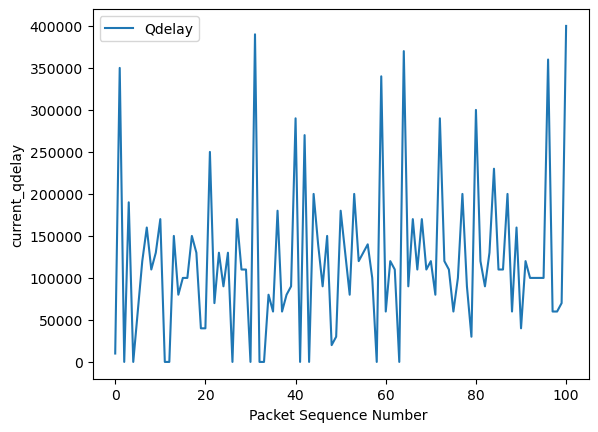

In [201]:
plt.plot(worker1.index,worker1['current_qdelay'],'-', label="Qdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('current_qdelay')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()

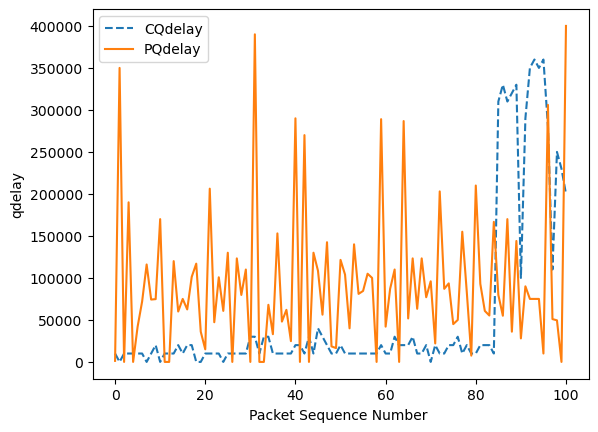

In [202]:
# plt.plot(worker1.index,worker1['current_qdelay'],'--', label="CQdelay")
plt.plot(worker1.index,df_sort['current_qdelay'][0:101],'--', label="CQdelay")
plt.plot(worker1.index,worker1['predicted_qdelay'],'-', label="PQdelay")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('qdelay')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()

In [203]:
worker1['reward'].describe()

count    101.000000
mean      -3.780941
std        2.886697
min      -12.500000
25%       -4.687500
50%       -3.437500
75%       -1.875000
max       -0.000000
Name: reward, dtype: float64

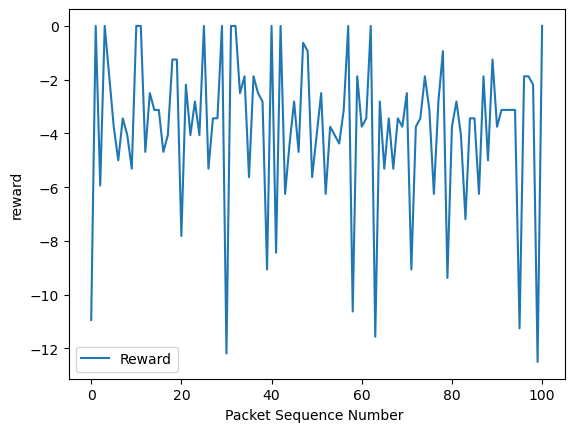

In [204]:
plt.plot(worker1.index,worker1['reward'],'-', label="Reward")

plt.xlabel('Packet Sequence Number ')
plt.ylabel('reward')
plt.title("")
plt.legend()

plt.savefig("graph1.png", dpi=100,facecolor='white', transparent=False)
plt.show()